In [39]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Script to Trimm and save shapfiles using a set of geographic units

In [40]:
#Fill out the paths of both files
untrimmed_shp_path = 'Shapefiles/un-trimmed/SA1_2016_Australia/SA1_2016_AUST.shp'
selected_units_path =  'Geographical_Units/Great_Melbourne_Units/SA1_2016_GM.csv'
crs = 7899

In [41]:
#load the files and find the two pivot columns
untrimmed_shp = gpd.read_file(untrimmed_shp_path).to_crs(crs)
selected_units = pd.read_csv(selected_units_path)

print(selected_units.columns[0])
print(untrimmed_shp.columns)

SA1_MAINCODE_2016
Index(['SA1_MAIN16', 'SA1_7DIG16', 'SA2_MAIN16', 'SA2_5DIG16', 'SA2_NAME16',
       'SA3_CODE16', 'SA3_NAME16', 'SA4_CODE16', 'SA4_NAME16', 'GCC_CODE16',
       'GCC_NAME16', 'STE_CODE16', 'STE_NAME16', 'AREASQKM16', 'geometry'],
      dtype='object')


In [43]:
#Select column in untrimmed file to be changed before join
pivot_col = selected_units.columns[0]
shp_pivot_col = 'SA1_MAIN16'

#unify pivot columns' name
untrimmed_shp.rename(columns={shp_pivot_col: pivot_col}, inplace=True)

#Cast codes to string
selected_units[[pivot_col]] = selected_units[[pivot_col]].astype(str)
untrimmed_shp[[pivot_col]] = untrimmed_shp[[pivot_col]].astype(str)

#Trim
result_trimmed = untrimmed_shp.merge(selected_units, on=pivot_col, how="right")

In [44]:
#Save file
result_trimmed.to_file("Shapefiles/Great_Melbourne/SA1_2016_GM/SA1_2016_GM.shp")

<ipython-input-44-836015aa5e00>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  result_trimmed.to_file("Shapefiles/Great_Melbourne/SA1_2016_GM/SA1_2016_GM.shp")


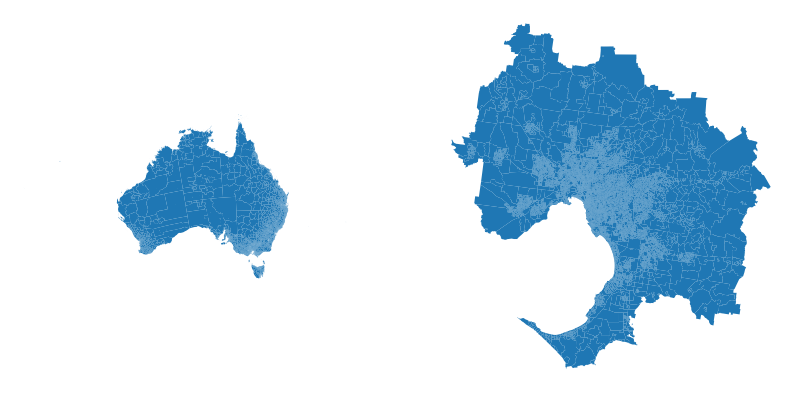

In [38]:
#plot
fig, ax = plt.subplots(1,2, figsize=(14,7))
untrimmed_shp.plot(ax=ax[0])
result_trimmed.plot(ax=ax[1])
for ax in ax:
    ax.axis('off')